In [1]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd
import matplotlib as mpl
import scipy.signal
import mne
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

# Extract raw field evoked by dot presentation

In [12]:
dots = [1,2,3]
bl = (-0.3, 0)
endt = 0.2
chtype = 'mag'

load data

In [3]:
epochs_raw = helpers.load_meg_epochs(hfreq=100, sfreq=100, window=[0, 0.4], chtype=chtype, bl=bl)
evoked = helpers.load_evoked_container(window=[0, endt])

Reading data/meg_final_data/evoked_sfreq100.0_window0.00-0.20_mag-ave.fif ...
    Found the data of interest:
        t =       0.00 ...     200.00 ms (dot_1_onset)
        0 CTF compensation matrices available
        nave = 480 - aspect type = 100
No baseline correction applied


re-epoch around dot onsets

In [13]:
epochs = pd.concat(
    [epochs_raw.loc[(slice(None), slice(None), slice(100 * (d-1), 100 * (d-1) + 200)), :] for d in dots],
    keys=dots, names=['dot']+epochs_raw.index.names)
epochs = epochs.reorder_levels(['subject', 'trial', 'dot', 'time'])

epochs.reset_index('time', inplace=True)
epochs['time'] = np.tile((evoked.times * 1000).astype(int), int(epochs.shape[0] / 21))
epochs.set_index('time', inplace=True, append=True)
epochs.sort_index(level=['subject', 'trial', 'dot', 'time'], inplace=True)

compute visually evoked fields by averaging across trials and selected dots

In [14]:
vefs = epochs.groupby(level=['subject', 'time']).mean()

## plot across subject average field for one sensor location

<IPython.core.display.Javascript object>


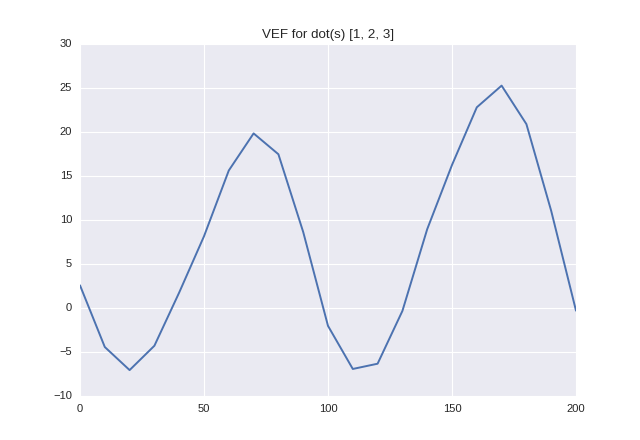

In [15]:
data = vefs.mean(level='time')
fig = plt.figure()
plt.plot(data.index, data['MEG2111']);
plt.title('VEF for dot(s) ' + dots.__str__());

<IPython.core.display.Javascript object>


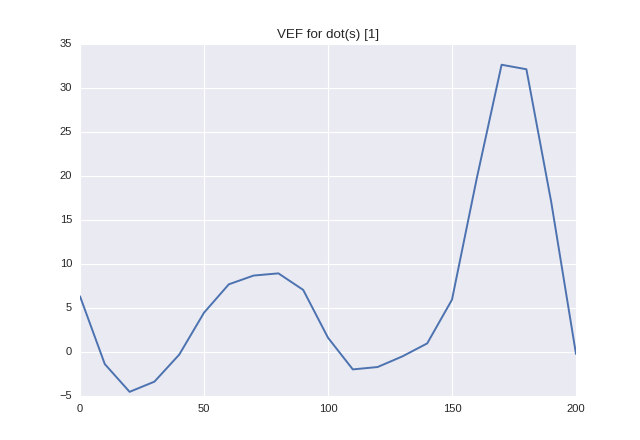

In [7]:
data = vefs.mean(level='time')
fig = plt.figure()
plt.plot(data.index, data['MEG2111']);
plt.title('VEF for dot(s) ' + dots.__str__());

<IPython.core.display.Javascript object>


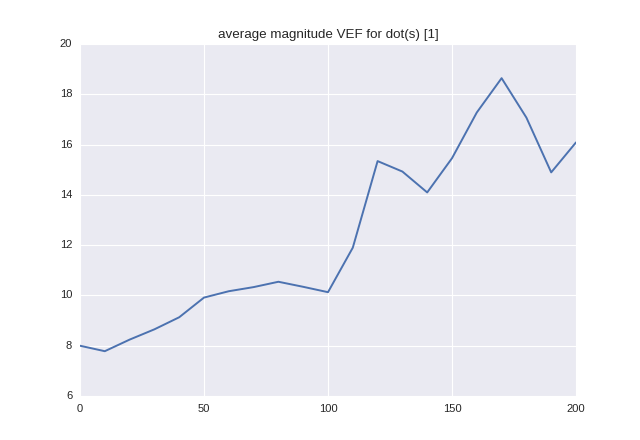

In [8]:
data = vefs.mean(level='time')
fig = plt.figure()
plt.plot(data.index, data.abs().mean(axis=1));
plt.title('average magnitude VEF for dot(s) ' + dots.__str__());

## plot across subject visually evoked field topology

In [16]:
ev = mne.EvokedArray(vefs.mean(level='time').values.T, 
                     evoked.info, nave=480*len(dots))

<IPython.core.display.Javascript object>


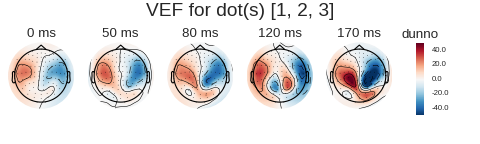

In [17]:
times = [0, 0.05, 0.08, 0.12, 0.17]
fig = ev.plot_topomap(times, scale=1, vmin=-50, vmax=50, image_interp='nearest', 
                      title='VEF for dot(s) ' + dots.__str__(), unit='dunno', 
                      outlines='skirt');

<IPython.core.display.Javascript object>


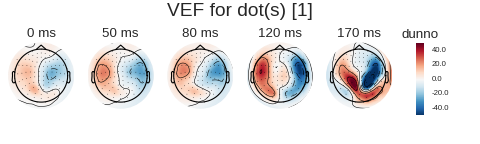

In [11]:
times = [0.0, 0.05, 0.08, 0.12, 0.17]
fig = ev.plot_topomap(times, scale=1, vmin=-50, vmax=50, image_interp='nearest', 
                      title='VEF for dot(s) ' + dots.__str__(), unit='dunno', 
                      outlines='skirt');